Practice activity: Evaluating deep learning models in the context of generative AI
Introduction
In this practice activity, you will evaluate the performance of deep learning models within the context of GenAI, specifically focusing on generative adversarial networks (GANs) and autoencoders. 

By the end of this practice activity, you will:

Compare the performance of these models in tasks related to data generation and reconstruction.

Use appropriate evaluation metrics for generative models.

Analyze the results to understand which model is best suited for various GenAI tasks.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

2025-07-10 11:32:58.848355: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-10 11:32:58.956386: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-07-10 11:32:58.956410: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-07-10 11:32:58.984652: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-10 11:33:00.058086: W tensorflow/stream_executor/platform/de

Evaluate an autoencoder
Objective
You will evaluate an autoencoder by measuring how accurately it can reconstruct images from the MNIST dataset. The evaluation metric will be MSE.

In [2]:
# Load MNIST dataset
(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten images
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [3]:
# Define the encoder
encoder = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu')  # Bottleneck layer
])

# Define the decoder
decoder = models.Sequential([
    layers.Input(shape=(64,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(784, activation='sigmoid')  # Reconstructed output
])

# Build the autoencoder model
autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=20, batch_size=256, validation_data=(X_test, X_test))

2025-07-10 11:34:49.230862: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-07-10 11:34:49.230900: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2025-07-10 11:34:49.230925: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-dadea9): /proc/driver/nvidia/version does not exist
2025-07-10 11:34:49.231141: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-10 11:34:49.413742: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000

Epoch 1/20


2025-07-10 11:34:49.605011: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


231/235 [============================>.] - ETA: 0s - loss: 0.0575

2025-07-10 11:34:51.828289: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.
2025-07-10 11:34:51.868982: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


235/235 [==============================] - 2s 8ms/step - loss: 0.0572 - val_loss: 0.0300
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0242 - val_loss: 0.0191
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0171 - val_loss: 0.0147
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0140 - val_loss: 0.0125
Epoch 5/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0122 - val_loss: 0.0112
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0110 - val_loss: 0.0102
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0102 - val_loss: 0.0095
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 9/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0089 - val_loss: 0.0084
Epoch 10/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0084 - val_loss: 0.0080
Epoch 11/2

In [4]:
# Predict reconstructed images
reconstructed_images = autoencoder.predict(X_test)

# Calculate the mean squared error
mse = np.mean(np.square(X_test - reconstructed_images))
print(f'Autoencoder Reconstruction MSE: {mse}')

 46/313 [===>..........................] - ETA: 0s 

2025-07-10 11:36:25.189547: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 1ms/step
Autoencoder Reconstruction MSE: 0.0056522018276154995


Evaluation metric
MSE measures how well the autoencoder can reconstruct the original images. Lower MSE values indicate better reconstruction qualit

Evaluating a GAN
Objective
You will evaluate the performance of a GAN by examining its ability to generate realistic images from random noise. The evaluation metric will be a visual inspection of the generated images, combined with the discriminator accuracy in distinguishing real from fake images.

In [5]:
# Define the generator
def build_generator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(100,)),
        layers.Dense(784, activation='sigmoid')  # Output: 28x28 flattened image
    ])
    return model

# Define the discriminator
def build_discriminator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),
        layers.Dense(1, activation='sigmoid')  # Output: Probability (real or fake)
    ])
    return model

In [6]:
generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Stack the generator and discriminator
gan = models.Sequential([generator, discriminator])
discriminator.trainable = False
gan.compile(optimizer='adam', loss='binary_crossentropy')

 Train the GAN
Note: The training process for the GAN in Step 3 may take a significant amount of time to complete, depending on hardware capabilities and dataset size. If the training duration is too long, consider adjusting the number of epochs to a lower value to balance performance and efficiency. Reducing epochs can speed up execution while still providing meaningful results. Feel free to experiment with different values to find an optimal balance.

1/1 [==============================] - 0s 13ms/step
Epoch 0, Discriminator Loss: 0.3129817545413971, Generator Loss: 2.929337739944458
1/1 [==============================] - 0s 14ms/step


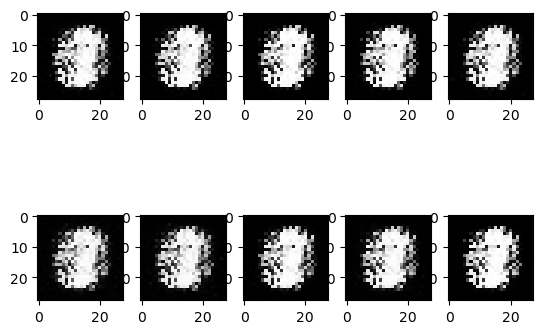

1/1 [==============================] - 0s 12ms/step


2025-07-10 11:45:00.686317: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 13ms/step


2025-07-10 11:45:07.470274: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 13ms/step


2025-07-10 11:45:21.940228: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 13ms/step


2025-07-10 11:45:28.164461: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 13ms/step


2025-07-10 11:45:36.909952: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 16ms/step
Epoch 1000, Discriminator Loss: 0.0010239488910883665, Generator Loss: 9.800163269042969
1/1 [==============================] - 0s 16ms/step


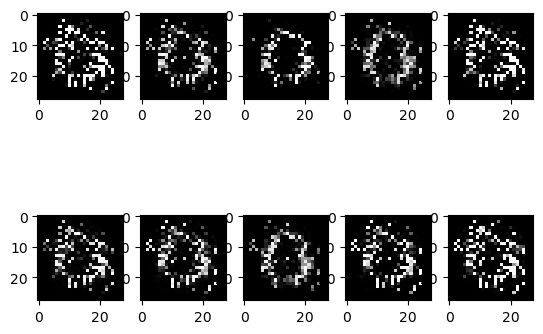

1/1 [==============================] - 0s 13ms/step


2025-07-10 11:45:40.635373: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 14ms/step


2025-07-10 11:45:44.779408: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 17ms/step


2025-07-10 11:45:49.329527: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 16ms/step


2025-07-10 11:46:00.197385: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 14ms/step


2025-07-10 11:46:26.133153: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 15ms/step
Epoch 2000, Discriminator Loss: 0.001184833119623363, Generator Loss: 7.355780601501465
1/1 [==============================] - 0s 17ms/step


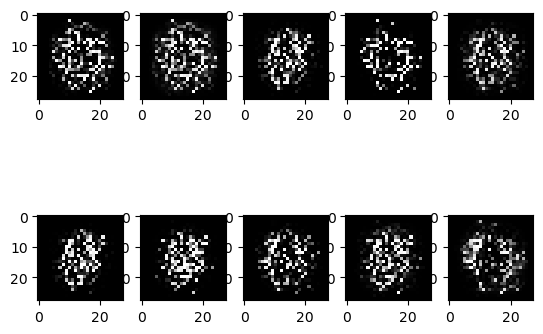

1/1 [==============================] - 0s 12ms/step


2025-07-10 11:46:47.454010: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 15ms/step


2025-07-10 11:47:00.792384: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 26ms/step


2025-07-10 11:47:01.238280: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 13ms/step


2025-07-10 11:47:05.520191: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 13ms/step


2025-07-10 11:47:17.985523: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 13ms/step
Epoch 3000, Discriminator Loss: 0.00027215760201215744, Generator Loss: 7.146395683288574
1/1 [==============================] - 0s 16ms/step


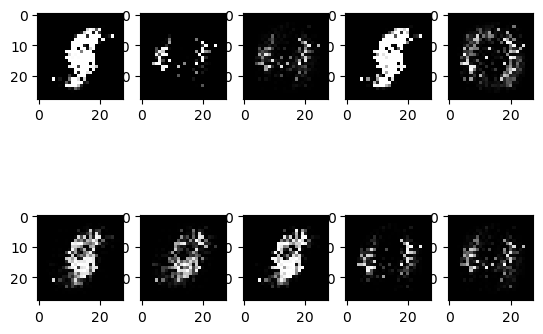

1/1 [==============================] - 0s 18ms/step


2025-07-10 11:47:32.150981: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 13ms/step


2025-07-10 11:47:38.216129: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 25ms/step


2025-07-10 11:47:42.231957: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 13ms/step


2025-07-10 11:47:42.724375: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 14ms/step


2025-07-10 11:47:57.210161: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 12ms/step


2025-07-10 11:48:05.712485: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 15ms/step


2025-07-10 11:48:07.282242: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 14ms/step


2025-07-10 11:48:11.225671: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 18ms/step


2025-07-10 11:48:15.129137: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 13ms/step
Epoch 4000, Discriminator Loss: 0.5512124300003052, Generator Loss: 7.765210151672363
1/1 [==============================] - 0s 14ms/step


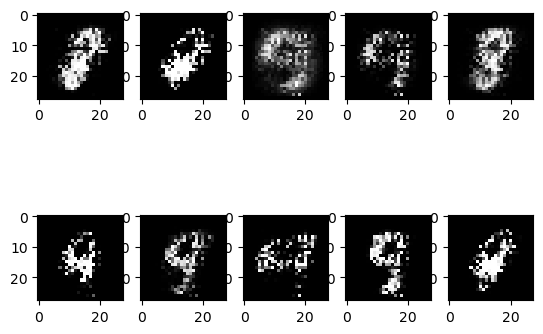

1/1 [==============================] - 0s 14ms/step


2025-07-10 11:48:38.625652: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 14ms/step


2025-07-10 11:48:48.956440: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 13ms/step


2025-07-10 11:48:57.181233: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 12ms/step


2025-07-10 11:49:03.779048: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 14ms/step


2025-07-10 11:49:06.775719: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 15ms/step


2025-07-10 11:49:14.965823: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 13ms/step
Epoch 5000, Discriminator Loss: 0.09781504422426224, Generator Loss: 3.774717330932617
1/1 [==============================] - 0s 14ms/step


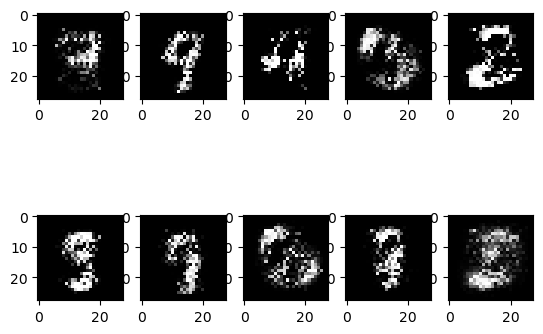

1/1 [==============================] - 0s 16ms/step


2025-07-10 11:49:24.054705: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 12ms/step


2025-07-10 11:49:24.515559: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 13ms/step


2025-07-10 11:49:28.143633: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 15ms/step


2025-07-10 11:49:53.192782: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 13ms/step


2025-07-10 11:49:57.075172: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 14ms/step


2025-07-10 11:50:03.994406: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 24ms/step


2025-07-10 11:50:05.962658: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 14ms/step


2025-07-10 11:50:07.387655: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - ETA: 0s

2025-07-10 11:50:09.488424: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 14ms/step
Epoch 6000, Discriminator Loss: 0.15211516618728638, Generator Loss: 5.054184913635254
1/1 [==============================] - 0s 13ms/step


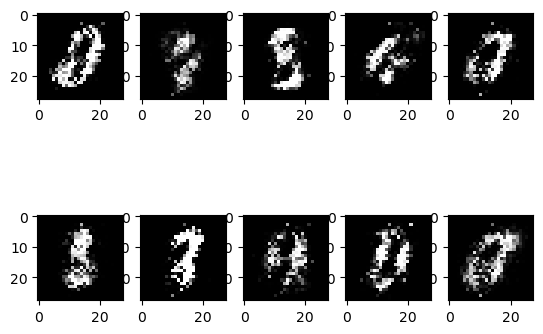

1/1 [==============================] - 0s 12ms/step


2025-07-10 11:50:25.664778: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 20ms/step


2025-07-10 11:50:26.077080: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 37ms/step


2025-07-10 11:50:28.549821: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2025-07-10 11:50:28.576718: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 23ms/step


2025-07-10 11:50:36.892308: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 13ms/step


2025-07-10 11:51:05.323021: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 17ms/step


2025-07-10 11:51:07.693993: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


Epoch 7000, Discriminator Loss: 0.2175479531288147, Generator Loss: 3.3135876655578613
1/1 [==============================] - 0s 15ms/step


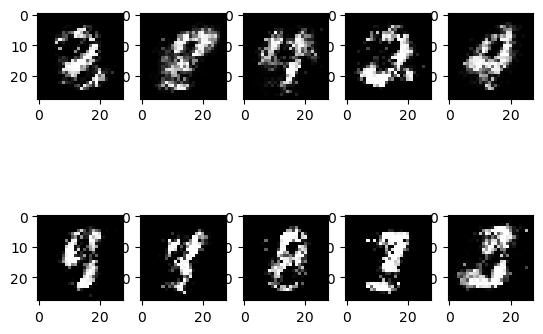

1/1 [==============================] - 0s 13ms/step


2025-07-10 11:51:18.088007: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 13ms/step


2025-07-10 11:51:30.054310: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


1/1 [==============================] - 0s 15ms/step


: 

In [8]:
# Training GAN
epochs = 10000
batch_size = 64
half_batch = batch_size // 2

for epoch in range(epochs):
    # Real images
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    real_images = X_train[idx]
    real_labels = np.ones((half_batch, 1))

    # Fake images
    noise = np.random.normal(0, 1, (half_batch, 100))
    fake_images = generator.predict(noise)
    fake_labels = np.zeros((half_batch, 1))

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

    # Train the generator (via GAN model)
    noise = np.random.normal(0, 1, (batch_size, 100))
    gan_labels = np.ones((batch_size, 1))  # Try to fool the discriminator
    g_loss = gan.train_on_batch(noise, gan_labels)

    # Every 1000 epochs, print losses and visualize generated images
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss_real[0]}, Generator Loss: {g_loss}")
        # Generate and display images
        generated_images = generator.predict(np.random.normal(0, 1, (10, 100)))
        for i in range(10):
            plt.subplot(2, 5, i+1)
            plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
        plt.show()

Evaluate the GAN’s performance
Discriminator accuracy: track the accuracy of the discriminator during training. High accuracy means the discriminator is good at distinguishing real from fake images.

Visual inspection: observe the quality of the generated images every 1000 epochs. Over time, the generated images should become more realistic.

Step 4: Compare the models
Autoencoder: use the MSE score to evaluate the model’s ability to reconstruct the MNIST images.

GAN: use a combination of discriminator accuracy and visual inspection to evaluate how realistic the generated images are.

In [ ]:
reconstructed_images = discriminator.predict(X_test)

In [ ]:
# Predict reconstructed images
reconstructed_images = autoencoder.predict(X_test)

# Calculate the mean squared error
mse = np.mean(np.square(X_test - reconstructed_images))
print(f'Autoencoder Reconstruction MSE: {mse}')